In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

In [2]:
def generateNetwork(inputDimension, outputDimension, layerConfiguration):
    X = tf.placeholder("float", [None, inputDimension])
    Y = tf.placeholder("float", [None, outputDimension])
    keep_prob = tf.placeholder(tf.float32)
    """Build Graph"""
    prev = X
    prevLayerConfig = inputDimension
        
    for layerConf in layerConfiguration:
        hiddenLayer = tf.add(tf.matmul(prev, 
                                           tf.Variable(tf.random_normal([prevLayerConfig, layerConf]))), 
                                           tf.Variable(tf.random_normal([layerConf])))
        
        drop_out = tf.nn.dropout(hiddenLayer, keep_prob)
        prev = drop_out
        prevLayerConfig = layerConf
        
    outputLayer = tf.matmul(prev, tf.Variable(tf.random_normal([prevLayerConfig, 
                                        outputDimension]))) + tf.Variable(tf.random_normal([outputDimension]))
    
    return outputLayer, X, Y, keep_prob

In [3]:
def trainModel(session, network, 
               xContainer, yContainer, keepProb, xTrain, yTrain, xValidation, yValidation, 
               learningRate, epochs):
    trainSetLoss = []
    validationSetAcc = []
    trainSetAcc = []
    lossFunction = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=network,
                                                        labels=yContainer))
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learningRate)
    trainOperation = optimizer.minimize(lossFunction)
    
    prediction = tf.equal(tf.argmax(network, 1), tf.argmax(yContainer, 1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    session.run(tf.global_variables_initializer())

    for i in range(0, epochs):
        session.run(trainOperation, feed_dict={xContainer: xTrain, yContainer: yTrain, keepProb:0.65})
        loss, acc = session.run([lossFunction, accuracy], feed_dict={xContainer: xTrain,
                                                                 yContainer: yTrain, keepProb:1})
        
        if i%50 ==0:
            print("Training accuracy "+str(acc))
            
        trainSetLoss.append(loss)
        trainSetAcc.append(acc)
        loss, acc = session.run([lossFunction, accuracy], feed_dict={xContainer: xValidation,
                                                                 yContainer: yValidation, keepProb: 1})
        
        if i%50 ==0:
            print("Validation accuracy "+str(acc))
            
        validationSetAcc.append(acc)
    return trainSetLoss, trainSetAcc, validationSetAcc

In [4]:
dataSet = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
xTest = dataSet.test.images
yTest = dataSet.test.labels

xTrain = dataSet.train.images
xValidation = dataSet.validation.images
yTrain = dataSet.train.labels
yValidation = dataSet.validation.labels

# One hidden layer - 15 nodes

In [6]:
"""Create session"""
session = tf.Session()

In [9]:
network, X, Y, keep_prob = generateNetwork(784, 10, [15])

trainSetLoss, trainSetAcc, validationSetAcc = trainModel(session, network, X, Y, keep_prob,
                                          xTrain, yTrain, xValidation, yValidation, 0.05, 500)


Training accuracy 0.0935091
Validation accuracy 0.0968
Training accuracy 0.857327
Validation accuracy 0.8688
Training accuracy 0.881418
Validation accuracy 0.8924
Training accuracy 0.890582
Validation accuracy 0.8988
Training accuracy 0.895491
Validation accuracy 0.902
Training accuracy 0.899018
Validation accuracy 0.9046
Training accuracy 0.902436
Validation accuracy 0.9068
Training accuracy 0.904236
Validation accuracy 0.9102
Training accuracy 0.906709
Validation accuracy 0.9108
Training accuracy 0.908309
Validation accuracy 0.912


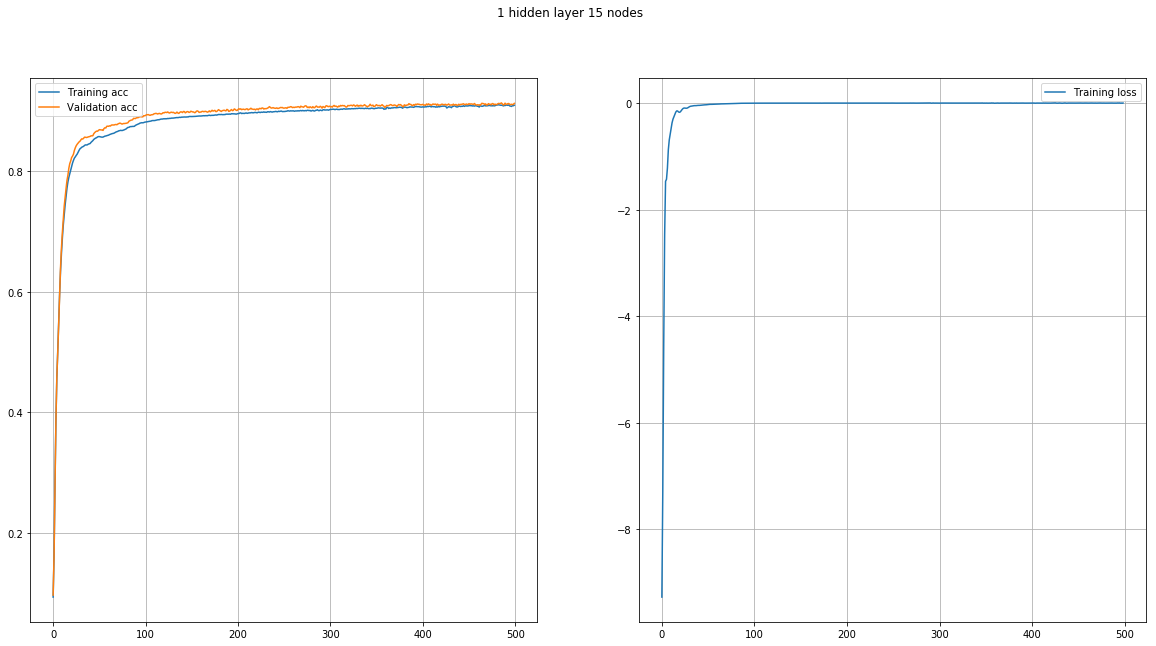

In [13]:
trainSetLossCalc = [x - trainSetLoss[i - 1] for i, x in enumerate(trainSetLoss)][1:]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.suptitle("1 hidden layer 15 nodes")
ax[0].plot(trainSetAcc, label = "Training acc")


ax[0].plot(validationSetAcc, label = "Validation acc")



ax[0].grid()
ax[0].legend()

ax[1].plot(trainSetLossCalc, label = "Training loss")
ax[1].grid()
ax[1].legend()

plt.show()

In [14]:
"""Save model"""
saver = tf.train.Saver()
saver.save(session, "Model/Model-1")
session.close()

In [15]:
session = tf.Session()
saver.restore(session, "Model/Model-1")

INFO:tensorflow:Restoring parameters from Model/Model-1


In [16]:
"""Validating the accuracy against test set"""
prediction = tf.equal(tf.argmax(network, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))


acc = session.run([accuracy], feed_dict={X: xTest, Y: yTest, keep_prob: 1})

In [17]:
print("Test set accuracy "+str(acc))
session.close()

Test set accuracy [0.90549999]


# Preforming grid search



Layer Configuration[15]
Training accuracy 0.186382
Validation accuracy 0.1932
Training accuracy 0.850673
Validation accuracy 0.8604
Training accuracy 0.867582
Validation accuracy 0.8718
Training accuracy 0.878564
Validation accuracy 0.8832
Training accuracy 0.885018
Validation accuracy 0.8888
Training accuracy 0.888982
Validation accuracy 0.8942
Training accuracy 0.891855
Validation accuracy 0.8956
Training accuracy 0.894982
Validation accuracy 0.9006
Training accuracy 0.897055
Validation accuracy 0.9026
Training accuracy 0.898382
Validation accuracy 0.906


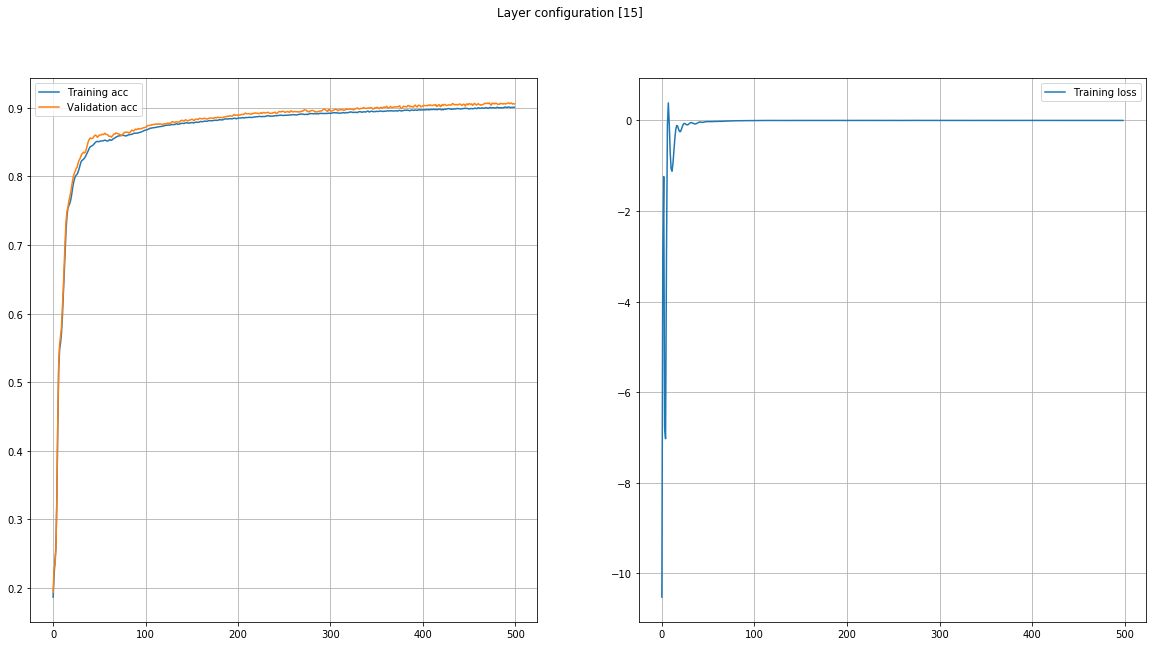



 Test set accuracy [0.9012]


Layer Configuration[25]
Training accuracy 0.148727
Validation accuracy 0.1478
Training accuracy 0.879891
Validation accuracy 0.8886
Training accuracy 0.891964
Validation accuracy 0.8994
Training accuracy 0.9016
Validation accuracy 0.9074
Training accuracy 0.904582
Validation accuracy 0.9078
Training accuracy 0.9056
Validation accuracy 0.9104
Training accuracy 0.908655
Validation accuracy 0.9114
Training accuracy 0.909236
Validation accuracy 0.9112
Training accuracy 0.912018
Validation accuracy 0.9138
Training accuracy 0.913345
Validation accuracy 0.9166


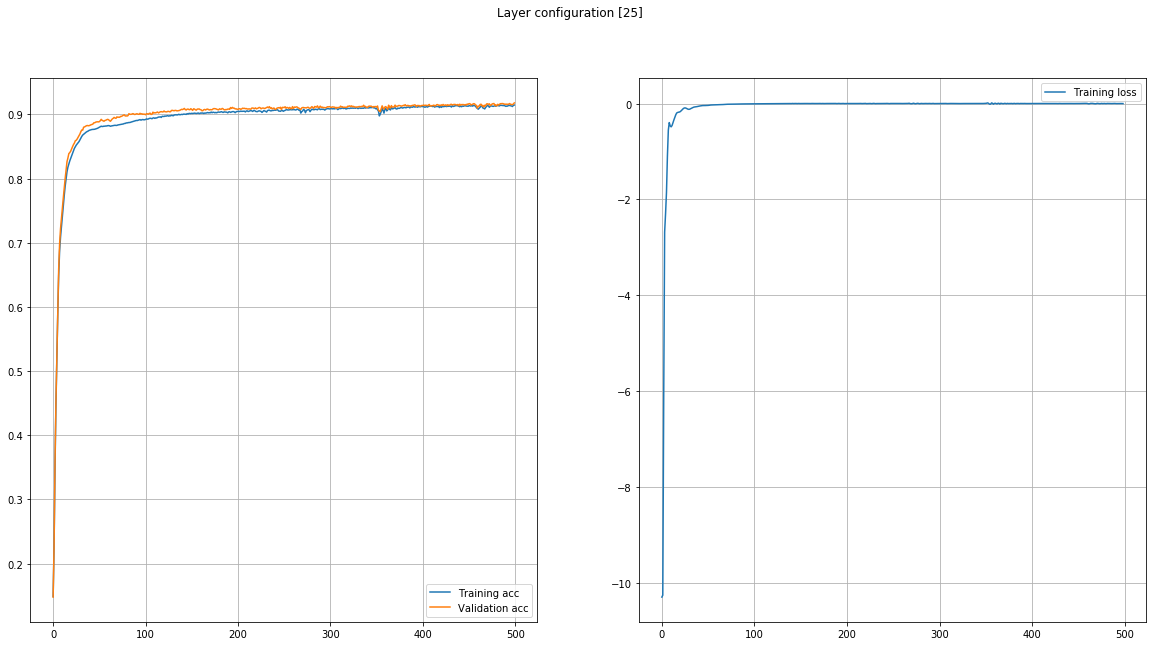



 Test set accuracy [0.91119999]


Layer Configuration[15, 15]
Training accuracy 0.157145
Validation accuracy 0.1494
Training accuracy 0.786509
Validation accuracy 0.8
Training accuracy 0.810636
Validation accuracy 0.8254
Training accuracy 0.829309
Validation accuracy 0.8388
Training accuracy 0.835545
Validation accuracy 0.8464
Training accuracy 0.841055
Validation accuracy 0.8482
Training accuracy 0.846636
Validation accuracy 0.8522
Training accuracy 0.849218
Validation accuracy 0.8564
Training accuracy 0.851255
Validation accuracy 0.8574
Training accuracy 0.8526
Validation accuracy 0.8616


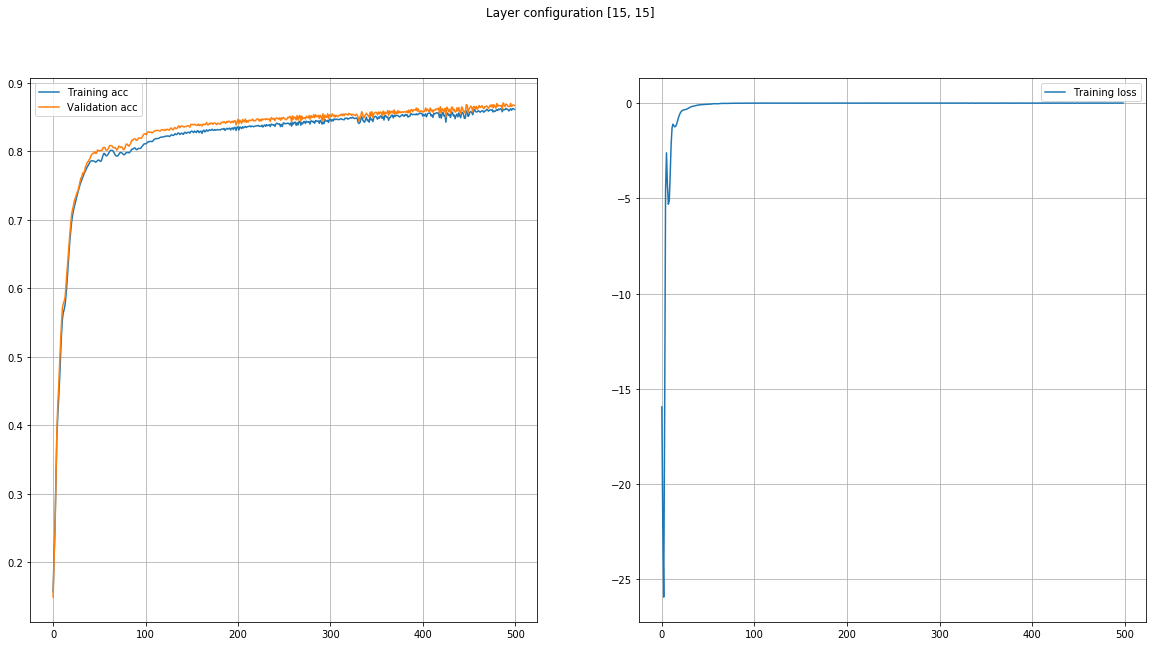



 Test set accuracy [0.86570001]


Layer Configuration[25, 25]
Training accuracy 0.140255
Validation accuracy 0.1408
Training accuracy 0.860218
Validation accuracy 0.8708
Training accuracy 0.863073
Validation accuracy 0.8712
Training accuracy 0.865455
Validation accuracy 0.8744
Training accuracy 0.872
Validation accuracy 0.8798
Training accuracy 0.8738
Validation accuracy 0.8824
Training accuracy 0.873727
Validation accuracy 0.8794
Training accuracy 0.882255
Validation accuracy 0.8858
Training accuracy 0.882836
Validation accuracy 0.888
Training accuracy 0.886018
Validation accuracy 0.8906


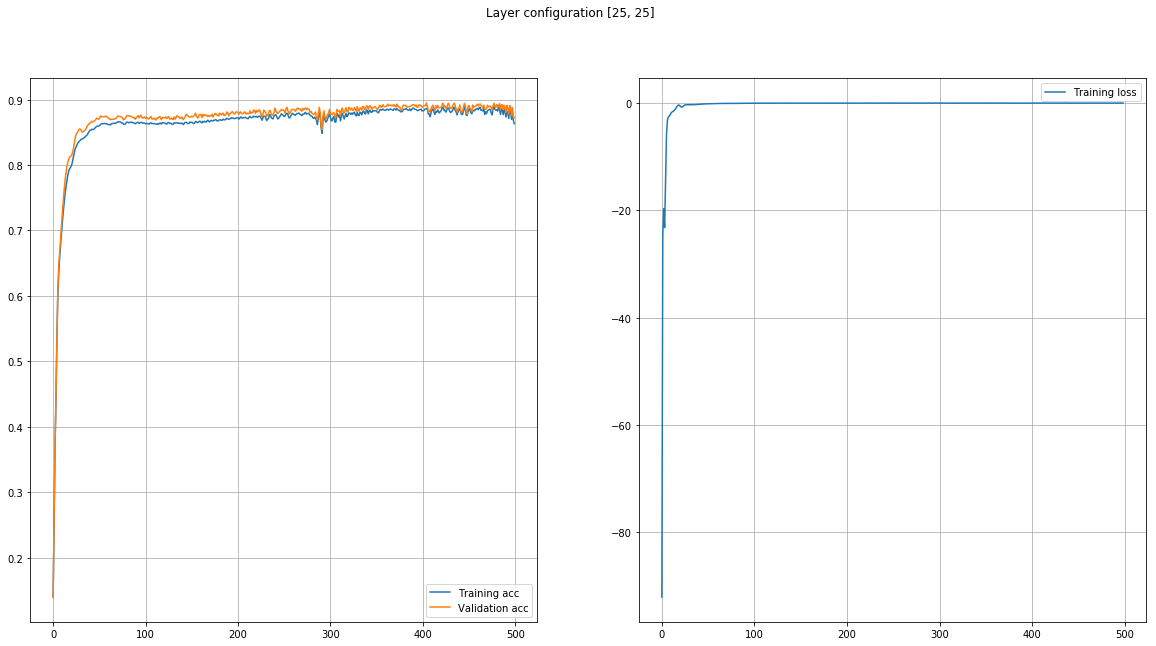



 Test set accuracy [0.86610001]


Layer Configuration[15, 25]
Training accuracy 0.112873
Validation accuracy 0.1094
Training accuracy 0.822964
Validation accuracy 0.8314
Training accuracy 0.824909
Validation accuracy 0.8252
Training accuracy 0.843436
Validation accuracy 0.8484
Training accuracy 0.850964
Validation accuracy 0.8542
Training accuracy 0.856709
Validation accuracy 0.8588
Training accuracy 0.859636
Validation accuracy 0.8628
Training accuracy 0.865145
Validation accuracy 0.8672
Training accuracy 0.865291
Validation accuracy 0.8696
Training accuracy 0.8676
Validation accuracy 0.8736


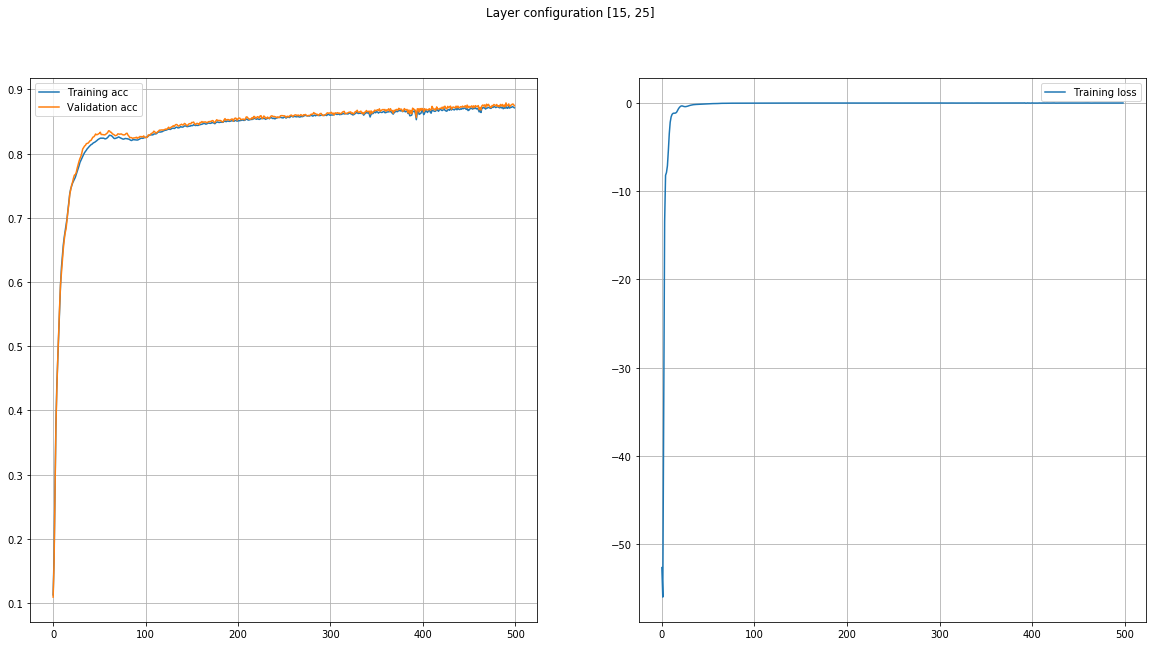



 Test set accuracy [0.87230003]


Layer Configuration[25, 15]
Training accuracy 0.168418
Validation accuracy 0.1664
Training accuracy 0.841618
Validation accuracy 0.8514
Training accuracy 0.841909
Validation accuracy 0.8462
Training accuracy 0.853945
Validation accuracy 0.8618
Training accuracy 0.860527
Validation accuracy 0.866
Training accuracy 0.858182
Validation accuracy 0.8658
Training accuracy 0.865764
Validation accuracy 0.8744
Training accuracy 0.871545
Validation accuracy 0.8778
Training accuracy 0.8738
Validation accuracy 0.8782
Training accuracy 0.875364
Validation accuracy 0.8806


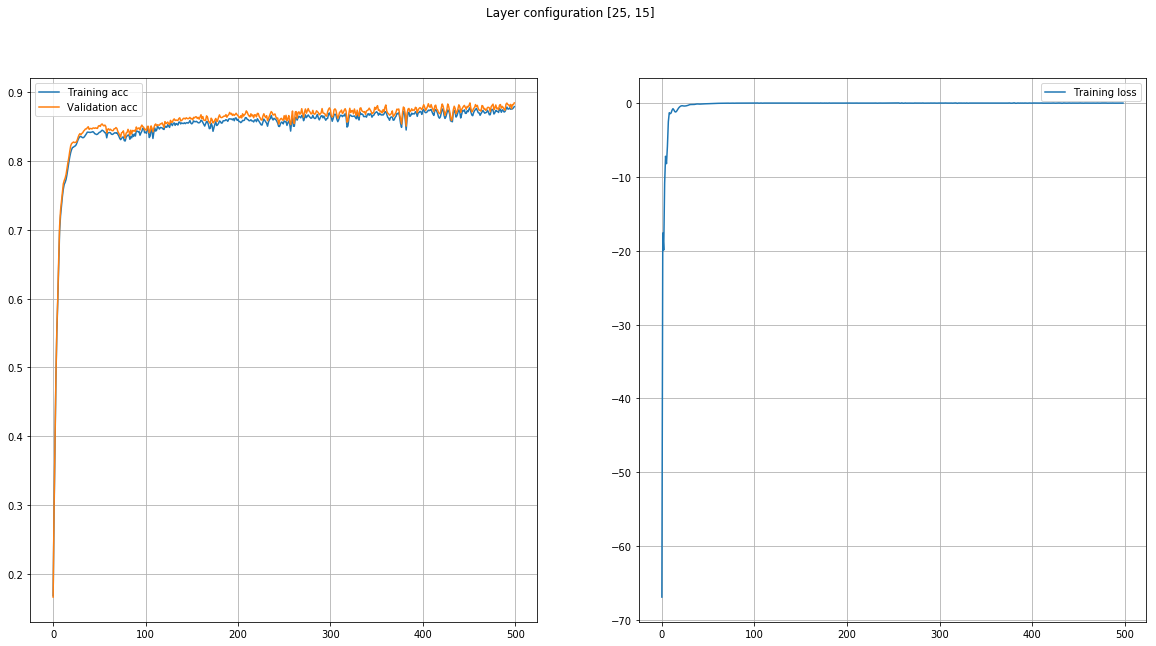



 Test set accuracy [0.87989998]


In [19]:
"""Performing grid search with learning rate constant"""
session = tf.Session()
bestModelValidationScore = None
for layerConfiguration in [[15], [25], [15, 15], [25, 25], [15, 25], [25, 15]]:
    print("\n\nLayer Configuration"+str(layerConfiguration))
    network, X, Y, keep_prob = generateNetwork(784, 10, layerConfiguration)

    trainSetLoss, trainSetAcc, validationSetAcc = trainModel(session, network, X, Y, keep_prob,
                                          xTrain, yTrain, xValidation, yValidation, 0.05, 500)
    
    if bestModelValidationScore == None or trainSetAcc[-1] > bestModelValidationScore:
        bestModelValidationScore = trainSetAcc[-1]
        saver.save(session, "Model/BestModel")
    
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    plt.suptitle("Layer configuration "+str(layerConfiguration))
    ax[0].plot(trainSetAcc, label = "Training acc")


    ax[0].plot(validationSetAcc, label = "Validation acc")



    ax[0].grid()
    ax[0].legend()

    trainSetLossCalc = [x - trainSetLoss[i - 1] for i, x in enumerate(trainSetLoss)][1:]
        
    ax[1].plot(trainSetLossCalc, label = "Training loss")
    ax[1].grid()
    ax[1].legend()

    plt.show()
    
    
    prediction = tf.equal(tf.argmax(network, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))


    acc = session.run([accuracy], feed_dict={X: xTest, Y: yTest, keep_prob: 1})

    print("\n\n Test set accuracy "+str(acc))


In [136]:
session.close()
session = tf.Session()
saver.restore(session, "Model/BestModel")
"""Validating the accuracy against test set"""
prediction = tf.equal(tf.argmax(network, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))


acc = session.run([accuracy], feed_dict={X: xTest, Y: yTest, keep_prob: 1})
print("Test set accuracy "+str(acc))
session.close()

INFO:tensorflow:Restoring parameters from Model/BestModel


The data is linearly seperable. Hence the network with one hidden layer performs better. Furthermore we can see that accuracy on validation set is better than train set. This is because of drop out layer used for regularization.